# Time series

+ 时间序列式非常重要的数据形式。在一系列时间点上观察到的数据序列就是时间序列数据。
+ 通常的时间序列数据根据数据采样的时间间隔可以分为固定频率或者非固定频率两类。

+ 我们分析的很多时间序列数据很多都是固定频率的序列，
  - 比如每季度、每年按期公布的宏观经济数据（GDP，CPI等）。
  - 当然这里的固定频率也并非一定是绝对的等时间间隔数据，比如我们通常说的日收益率，虽然都间隔一个交易日，但因为假期等因素的影响，数据发生的绝对时间并不是等间隔的。
+ 不等时间间隔的数据，如果我们将每一笔成交的数据都记录下来，这种数据一般不是等时间间隔的。

**三种时间类型**
+ 时间戳 timestamp, 特定时间
+ 固定时期，period，如2007年1月或2010年全年
+ 时间间隔 interval

+ Pandas 提供了一组标准的时间序列处理工具和数据算法，这些工具在处理金融和经济数据非常有用
+ 和前面章节一样，我们首先导入一些包和函数

In [40]:
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))

+ 查看当前工作目录

In [41]:
%pwd

'/Users/wrk/Documents/notebook0'

+ 下面命令使得图形能出现在notebook页面中

In [42]:
%matplotlib inline
#%matplotlib qt

## 日期和时间数据类型及工具
+ datetime模块包中提供了处理日期时间数据的工具, 以毫秒储存日期和时间，


In [43]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2016, 12, 12, 15, 26, 47, 38628)

+ 下面分别给出了 年、月、日、时、分、秒、微秒(百万分之一秒)

In [44]:
now.year, now.month, now.day,now.hour,now.minute,now.second,now.microsecond 

(2016, 12, 12, 15, 26, 47, 38628)

+ 我们可以直接对数据进行减法运算，得到两者的时间差

In [45]:
delta = datetime(2016, 10, 23) - datetime(1994, 12, 31)
delta

datetime.timedelta(7967)

In [46]:
delta.days

7967

In [47]:
delta.seconds

0

+ 也可以直接构造时间差数据类型,得到给定间隔的时间,timedelta表示两个datetime对象的时间差。时间和时间差之间可以进行加减运算。

In [48]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [49]:
start - 1 * timedelta(12)

datetime.datetime(2010, 12, 26, 0, 0)

### 字符串和datetime的相互转换

+ str或者strftime方法可以将日期时间转换为字符串


In [50]:
stamp = datetime(2011, 1, 3)

In [51]:
str(stamp)

'2011-01-03 00:00:00'

In [52]:
stamp.strftime('%Y-%d-%m')

'2011-03-01'

+ strptime可以将已知格式的日期时间字符串解析为时间类型 

In [53]:
value = '2011-01-03'
print(type(value))
a = datetime.strptime(value, '%Y-%m-%d')
print(a)

<class 'str'>
2011-01-03 00:00:00


In [54]:
datetime.strptime("2001-01-10 10:10:10", "%Y-%m-%d %I:%M:%S")

datetime.datetime(2001, 1, 10, 10, 10, 10)

In [55]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

datetime格式：

格式 | 含义
------ | ------
%Y | 四位年
%y |两位年
%m |2为月
%d |两位日
%H |时 24小时制
%I |时 12小时制
%M |分钟
%S |秒
%w |星期几,0表示周日
%W |每年的第几周 [0，53]，每年第一个星期一之前的那周为第0周
%F |%Y-%m-%d 简写 2014-2-1
%D |%m/%d/%y 简写 04/16/12


+ pandas中的to_datetime 方法也可以解析成组日期。

In [56]:
datestrs

['7/6/2011', '8/6/2011']

In [57]:
pd.to_datetime(datestrs)
# note: output changed (no '00:00:00' anymore)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

## Time Series Basics
Pandas 中最基本是时间序列类型是以时间为索引的Series

In [170]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.149286
2011-01-05    0.735026
2011-01-07   -1.245349
2011-01-08   -0.540527
2011-01-10    0.945974
2011-01-12   -1.688815
dtype: float64

+ 不同索引时间序列之间的运算会自动按时间对齐。

In [59]:
ts + ts[::2]
##：：2表示每取0，2，4


2011-01-02   -4.730339
2011-01-05         NaN
2011-01-07    0.254774
2011-01-08         NaN
2011-01-10   -1.645888
2011-01-12         NaN
dtype: float64

### Generating date ranges

In [171]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [61]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [62]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [63]:
pd.date_range('1/1/2015', '12/1/2015', freq='BM')
# freq选项很多，上面表示每月的最后一个工作日

DatetimeIndex(['2015-01-30', '2015-02-27', '2015-03-31', '2015-04-30',
               '2015-05-29', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-30', '2015-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [64]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [65]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)
#标准化

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 索引、选取、子集构造

 
+ 可以通过传入年，月，日举行选择Series的子集，非常方便。
+ 甚至可以非常直观的转入时间序列字符串设置选取的时间范围。

In [66]:
stamp = ts.index[2]
print(type(stamp))
ts[stamp]


<class 'pandas.tslib.Timestamp'>


0.12738713440357208

In [67]:
ts['1/10/2011']

-0.82294396460856623

In [68]:
ts['20110110']

-0.82294396460856623

In [69]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -0.928880
2000-01-02   -0.064284
2000-01-03   -0.336586
2000-01-04   -0.346874
2000-01-05    1.150436
2000-01-06   -0.842491
                ...   
2002-09-21    0.836130
2002-09-22    0.650643
2002-09-23    0.162436
2002-09-24   -2.658476
2002-09-25    2.745891
2002-09-26   -0.977209
Freq: D, dtype: float64

In [70]:
longer_ts['2001']

2001-01-01   -0.037591
2001-01-02   -0.059124
2001-01-03   -1.822025
2001-01-04   -1.084280
2001-01-05   -0.402487
2001-01-06    0.796813
                ...   
2001-12-26   -0.791609
2001-12-27   -0.008666
2001-12-28    0.458747
2001-12-29    1.211895
2001-12-30   -1.164603
2001-12-31    0.791993
Freq: D, dtype: float64

In [71]:
longer_ts['2001-05']

2001-05-01   -0.193695
2001-05-02   -1.174344
2001-05-03   -0.116335
2001-05-04   -0.181981
2001-05-05   -0.641732
2001-05-06    0.129555
                ...   
2001-05-26    1.630527
2001-05-27   -0.119031
2001-05-28    0.779960
2001-05-29    0.752473
2001-05-30    0.676372
2001-05-31   -0.591270
Freq: D, dtype: float64

In [72]:
ts

2011-01-02   -2.365170
2011-01-05    1.936797
2011-01-07    0.127387
2011-01-08   -0.844128
2011-01-10   -0.822944
2011-01-12    0.777867
dtype: float64

In [73]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.127387
2011-01-08   -0.844128
2011-01-10   -0.822944
2011-01-12    0.777867
dtype: float64

In [74]:
ts.truncate(after='1/9/2011')

2011-01-02   -2.365170
2011-01-05    1.936797
2011-01-07    0.127387
2011-01-08   -0.844128
dtype: float64

In [75]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.127387
2011-01-08   -0.844128
2011-01-10   -0.822944
dtype: float64

In [76]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')##周三
print(dates)
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.ix['5-2001']


DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

,Colorado,Texas,New York,Ohio
2001-05-02,-0.491474,0.377544,-0.301872,0.251225
2001-05-09,0.666199,-0.170523,-1.279545,-0.355211
2001-05-16,-0.100423,0.258871,0.992879,0.109061
2001-05-23,-1.403103,-0.031903,-1.549366,0.583849
2001-05-30,-1.267537,-0.473858,0.754160,1.799486


### Time series with duplicate indices
有时候一个时间点上可能有多个观察，即索引可以有重复，这时选择得到的数据可能是一组数据。

In [77]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000',
                          '1/3/2000'])
print(dates)
dup_ts = Series(np.arange(3), index=dates)
dup_ts

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='datetime64[ns]', freq=None)


2000-01-01    0
2000-01-02    1
2000-01-03    2
dtype: int64

In [78]:
dup_ts.index.is_unique

True

In [79]:
dup_ts['1/3/2000']  # not duplicated

2

In [80]:
dup_ts['1/2/2000']  # duplicated

1

In [81]:
grouped = dup_ts.groupby(level=0)##重复数据汇总  level表示分组的依据为index
grouped.mean()

2000-01-01    0
2000-01-02    1
2000-01-03    2
dtype: int64

In [82]:
grouped.count()

2000-01-01    1
2000-01-02    1
2000-01-03    1
dtype: int64

## Date ranges, Frequencies, and Shifting

+ 使用resample方法进行取样
+ pandas中生成一串时间的函数 date_range


In [83]:
ts

2011-01-02   -2.365170
2011-01-05    1.936797
2011-01-07    0.127387
2011-01-08   -0.844128
2011-01-10   -0.822944
2011-01-12    0.777867
dtype: float64

In [84]:
ts.resample('D').sum()##按日抽样，没有就补上 sum表示对一天有多个数据的进行求和

2011-01-02   -2.365170
2011-01-03         NaN
2011-01-04         NaN
2011-01-05    1.936797
2011-01-06         NaN
2011-01-07    0.127387
2011-01-08   -0.844128
2011-01-09         NaN
2011-01-10   -0.822944
2011-01-11         NaN
2011-01-12    0.777867
Freq: D, dtype: float64

###  频率和日期偏移量

In [85]:
from pandas.tseries.offsets import Hour, Minute
hour2 = Hour(2)
hour2

<2 * Hours>

In [86]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq=hour2)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 02:00:00',
               '2000-01-01 04:00:00', '2000-01-01 06:00:00',
               '2000-01-01 08:00:00', '2000-01-01 10:00:00',
               '2000-01-01 12:00:00', '2000-01-01 14:00:00',
               '2000-01-01 16:00:00', '2000-01-01 18:00:00',
               '2000-01-01 20:00:00', '2000-01-01 22:00:00',
               '2000-01-02 00:00:00', '2000-01-02 02:00:00',
               '2000-01-02 04:00:00', '2000-01-02 06:00:00',
               '2000-01-02 08:00:00', '2000-01-02 10:00:00',
               '2000-01-02 12:00:00', '2000-01-02 14:00:00',
               '2000-01-02 16:00:00', '2000-01-02 18:00:00',
               '2000-01-02 20:00:00', '2000-01-02 22:00:00',
               '2000-01-03 00:00:00', '2000-01-03 02:00:00',
               '2000-01-03 04:00:00', '2000-01-03 06:00:00',
               '2000-01-03 08:00:00', '2000-01-03 10:00:00',
               '2000-01-03 12:00:00', '2000-01-03 14:00:00',
               '2000-01-

In [87]:
Hour(2) + Minute(30)

<150 * Minutes>

In [88]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

+ 下面的freq选项表示每月第三个星期五，WOM表示 week of month

In [89]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='M')

list(rng)

[Timestamp('2012-01-31 00:00:00', offset='M'),
 Timestamp('2012-02-29 00:00:00', offset='M'),
 Timestamp('2012-03-31 00:00:00', offset='M'),
 Timestamp('2012-04-30 00:00:00', offset='M'),
 Timestamp('2012-05-31 00:00:00', offset='M'),
 Timestamp('2012-06-30 00:00:00', offset='M'),
 Timestamp('2012-07-31 00:00:00', offset='M'),
 Timestamp('2012-08-31 00:00:00', offset='M')]

### 数据时间的平移

将时间序列数据按时间平移，可以用来进行差分或者增长率计算。

In [90]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='MS',how = 'start'))
ts

2000-01-01   -0.350937
2000-02-01   -1.571412
2000-03-01    1.069184
2000-04-01    0.280302
Freq: MS, dtype: float64

In [91]:
ts.shift(2)

2000-01-01         NaN
2000-02-01         NaN
2000-03-01   -0.350937
2000-04-01   -1.571412
Freq: MS, dtype: float64

In [92]:
ts.shift(-2)

2000-01-01    1.069184
2000-02-01    0.280302
2000-03-01         NaN
2000-04-01         NaN
Freq: MS, dtype: float64

In [93]:
 ts/ts.shift(1)-1##增长率

2000-01-01         NaN
2000-02-01    3.477758
2000-03-01   -1.680397
2000-04-01   -0.737836
Freq: MS, dtype: float64

In [94]:
ts.shift(3, freq='B')

2000-01-05   -0.350937
2000-02-04   -1.571412
2000-03-06    1.069184
2000-04-05    0.280302
dtype: float64

In [95]:
ts.shift(3, freq='D')
# 相当于 freq=3D

2000-01-04   -0.350937
2000-02-04   -1.571412
2000-03-04    1.069184
2000-04-04    0.280302
dtype: float64

In [96]:
ts.shift(1, freq='3D')

2000-01-04   -0.350937
2000-02-04   -1.571412
2000-03-04    1.069184
2000-04-04    0.280302
dtype: float64

+ 移动90秒

In [97]:
ts.shift(1, freq='90T')

2000-01-01 01:30:00   -0.350937
2000-02-01 01:30:00   -1.571412
2000-03-01 01:30:00    1.069184
2000-04-01 01:30:00    0.280302
Freq: MS, dtype: float64

## 日期及其算术运算

+ A- 表示每年指定月份
+ Period 对象表示一段时间
+ 下列表示2007年1月1日到12月31日之间的整段时间

In [98]:
p = pd.Period(2007, freq='A-FEB')
p

Period('2007', 'A-FEB')

Period对象加减一个整数可根据其频率实现位移效果 

In [99]:
p + 5

Period('2012', 'A-FEB')

In [100]:
p - 2

Period('2005', 'A-FEB')

+ 两个等频率的Period对象的差就是他们之间的单位数量

In [101]:
pd.Period('2014', freq='A-FEB') - p

7

+ 表示 时期序列

In [173]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='D')
rng[1]

Period('2000-01-02', 'D')

In [103]:
Series(np.random.randn(6), index=rng)

2000-01   -0.961098
2000-02    0.190517
2000-03   -2.160192
2000-04    1.776277
2000-05    0.320153
2000-06   -1.241690
Freq: M, dtype: float64

In [104]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='int64', freq='Q-DEC')

In [105]:
Series(np.random.randn(3), index=index)

2001Q3   -2.831914
2002Q2    1.884336
2003Q1   -0.677339
Freq: Q-DEC, dtype: float64

### 时期频率转换

通过asfreq方法可以将时期或时期index转换为别的频率

In [106]:
p = pd.Period('2007', freq='A-MAR')

p.asfreq('D', how='start')


Period('2006-04-01', 'D')

In [107]:
p.asfreq('D', how='end')

Period('2007-03-31', 'D')

In [108]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [109]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [110]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [111]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng.asfreq('M'))
ts
print(rng)
print(ts)

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='int64', freq='A-DEC')
2006-12   -0.552626
2007-12   -0.569825
2008-12    0.078315
2009-12    0.699604
Freq: M, dtype: float64


In [112]:
ts.asfreq('M', how='end')

2006-12   -0.552626
2007-12   -0.569825
2008-12    0.078315
2009-12    0.699604
Freq: M, dtype: float64

In [113]:
ts.asfreq('B', how='end')

2006-12-29   -0.552626
2007-12-31   -0.569825
2008-12-31    0.078315
2009-12-31    0.699604
Freq: B, dtype: float64

### 按季度计算的时期频率

+ 季度型数据在会计、金融等领域很常见。很多数据都会涉及财年末的概念，通常表示数据刻画的时期几月开始，几月结束。用Q-表示


In [114]:
p = pd.Period('2012', freq='Q-JAN')

p######question??????

Period('2012Q4', 'Q-JAN')

In [115]:
p.asfreq('D', 'start')#######question??????

Period('2011-11-01', 'D')

In [116]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

下面的例子获取 季度倒数第二个工作日下午4点的时间戳

In [117]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60##asfreq得到的是时间段
p4pm

Period('2012-01-30 16:00', 'T')

In [118]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

下面的例子生成季度型范围

In [119]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

ts = Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [120]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### 将 Timestamps 转换为 Periods 

+ to_period方法
+ to_timestamp 方法

In [174]:
rng = pd.date_range('1/1/2000', periods=3, freq='MS')
print(rng[1])
ts = Series(randn(3), index=rng)
pts = ts.to_period()


2000-02-01 00:00:00


In [122]:
print(ts)
pts

2000-01-01   -0.967666
2000-02-01   -1.450263
2000-03-01    1.586628
Freq: MS, dtype: float64


2000-01   -0.967666
2000-02   -1.450263
2000-03    1.586628
Freq: M, dtype: float64

In [123]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(randn(6), index=rng)
ts2
ts2.to_period('M')
ts2

2000-01-29    0.739084
2000-01-30    0.167356
2000-01-31   -2.839920
2000-02-01    0.842092
2000-02-02    0.512930
2000-02-03   -0.744294
Freq: D, dtype: float64

In [124]:
pts = ts.to_period()
pts

2000-01   -0.967666
2000-02   -1.450263
2000-03    1.586628
Freq: M, dtype: float64

In [125]:
pts.to_timestamp(how='end')

2000-01-31   -0.967666
2000-02-29   -1.450263
2000-03-31    1.586628
Freq: M, dtype: float64

### 通过数组创建 PeriodIndex

In [126]:
data = pd.read_csv('data/macrodata.csv')
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
        ...  
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, dtype: float64

In [127]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
      ... 
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, dtype: float64

In [128]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='int64', length=203, freq='Q-DEC')

In [129]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
          ... 
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, dtype: float64

## 重采样和频率转换
重采样及频率转换。在进行金融时间序列分析时，我们有时候需要进行数据频率的转换，比方在时，日，周，月，季度和年度数据之间进行转换。从高频率数据聚合产生低频率数据称为降采样(downsampling),而将低频了数据转换为高频率这称为升采样（upsampling）。在pandas中，用resample方法实现频率转换。


In [130]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)
print(ts)
ts.resample('MS', how='mean')

2000-01-01   -0.397959
2000-01-02   -1.477995
2000-01-03    2.453163
2000-01-04   -0.385049
2000-01-05   -0.211049
2000-01-06   -0.623832
                ...   
2000-04-04    1.439685
2000-04-05   -0.899767
2000-04-06   -0.461805
2000-04-07    0.863939
2000-04-08   -0.610326
2000-04-09   -0.036316
Freq: D, dtype: float64


/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


2000-01-01    0.125323
2000-02-01   -0.191159
2000-03-01   -0.329384
2000-04-01    0.140102
Freq: MS, dtype: float64

parameter| decription
------ |------
rule|  string the offset string or object representing target conversion
**how** | string method for down- or re-sampling, default to ‘mean’ for downsampling
axis | int, optional, default 0
fill_method  | string, default None fill_method for upsampling
**closed**  | {‘right’, ‘left’} Which side of bin interval is closed
**label**|  {‘right’, ‘left’} Which bin edge label to label bucket with
convention | {‘start’, ‘end’, ‘s’, ‘e’}
kind|  “period”/”timestamp”
loffset | timedelta Adjust the resampled time labels
limit| int, default None, Maximum size gap to when reindexing with fill_method
base |  int, default 0 For frequencies that evenly subdivide 1 day, the “origin” of the aggregated intervals. For example, for ‘5min’ frequency, base could range from 0 through 4. Defaults to 0

In [131]:
ts.resample('M', how='mean', kind='period')

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


2000-01    0.125323
2000-02   -0.191159
2000-03   -0.329384
2000-04    0.140102
Freq: M, dtype: float64

### Downsampling

利用高频数据作低频的汇总

关键是要明确计算的区间，


In [132]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [133]:
ts.resample('5min').sum()
# note: output changed (as the default changed from closed='right', label='right' to closed='left', label='left'

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [134]:
ts.resample('5min',closed='left').sum()
# 包含左 端点，但不包含右端点

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [135]:
ts.resample('5min', closed='left', label='right').sum()

2000-01-01 00:05:00    10
2000-01-01 00:10:00    35
2000-01-01 00:15:00    21
Freq: 5T, dtype: int64

In [136]:
ts.resample('5min', loffset='-1s').sum()
#loffset=-1s,时间向前偏差1秒

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling

金融中计算区间的开盘价、收盘价、最高、最低价。

In [137]:
ts.resample('5min', how='ohlc')
# note: output changed because of changed defaults

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  if __name__ == '__main__':


,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### Resampling with GroupBy

In [138]:
rng = pd.date_range('1/1/2000', periods=1000, freq='D')
ts = Series(np.arange(1000), index=rng)
ts.groupby(lambda x: x.month).mean()##x 为 index
#groupby根据index元素的函数进行

1     380.666667
2     406.035294
3     440.000000
4     470.500000
5     501.000000
6     531.500000
7     562.000000
8     593.000000
9     605.918605
10    471.500000
11    502.000000
12    532.500000
dtype: float64

In [139]:
ts.groupby(lambda x:  x.weekday == True).mean()

False    499.416569
True     500.000000
dtype: float64

### Upsampling and interpolation

升采样和插值，
升采样时，有的值就会缺失，因此可以能要插值。

In [140]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.928248,-0.057107,-0.132005,-0.221934
2000-01-12,1.974732,-0.403195,0.001266,0.482761


In [141]:
df_daily = frame.resample('D')
df_daily

/Applications/anaconda/lib/python3.5/site-packages/IPython/utils/dir2.py:65: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  canary = getattr(obj, '_ipython_canary_method_should_not_exist_', None)
/Applications/anaconda/lib/python3.5/site-packages/IPython/utils/dir2.py:74: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  m = getattr(obj, name, None)


,Colorado,Texas,New York,Ohio
2000-01-05,0.928248,-0.057107,-0.132005,-0.221934
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.974732,-0.403195,0.001266,0.482761


In [142]:
frame.resample('D', fill_method='ffill')

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


,Colorado,Texas,New York,Ohio
2000-01-05,0.928248,-0.057107,-0.132005,-0.221934
2000-01-06,0.928248,-0.057107,-0.132005,-0.221934
2000-01-07,0.928248,-0.057107,-0.132005,-0.221934
2000-01-08,0.928248,-0.057107,-0.132005,-0.221934
2000-01-09,0.928248,-0.057107,-0.132005,-0.221934
2000-01-10,0.928248,-0.057107,-0.132005,-0.221934
2000-01-11,0.928248,-0.057107,-0.132005,-0.221934
2000-01-12,1.974732,-0.403195,0.001266,0.482761


In [143]:
frame.resample('D', fill_method='ffill', limit=2)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill(limit=2)
  if __name__ == '__main__':


,Colorado,Texas,New York,Ohio
2000-01-05,0.928248,-0.057107,-0.132005,-0.221934
2000-01-06,0.928248,-0.057107,-0.132005,-0.221934
2000-01-07,0.928248,-0.057107,-0.132005,-0.221934
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.974732,-0.403195,0.001266,0.482761


In [144]:
frame.resample('W-THU', fill_method='ffill')

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


,Colorado,Texas,New York,Ohio
2000-01-06,0.928248,-0.057107,-0.132005,-0.221934
2000-01-13,1.974732,-0.403195,0.001266,0.482761


### Resampling with periods

通过时期采样

In [145]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01,0.452218,-2.165628,-0.400673,-0.378722
2000-02,0.814069,1.839988,0.889619,-0.380150
2000-03,0.349032,0.307356,0.243404,-0.037227
2000-04,-1.950060,-2.164172,-0.335136,-0.246678
2000-05,0.323500,-0.138952,1.138309,-0.245809
2000-06,-0.152246,-0.026182,-0.119221,-0.556493
...,...,...,...,...
2001-07,-0.471498,-0.457227,-0.398600,0.064204
2001-08,2.216935,1.015055,1.679028,-1.537753
2001-09,0.566428,-0.554529,-0.214297,-1.310031


In [146]:
annual_frame = frame.resample('A-DEC', how='mean')
annual_frame

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


,Colorado,Texas,New York,Ohio
2000,0.113531,-0.505148,-0.130798,0.192340
2001,0.449437,0.123257,-0.314777,-0.415906


In [147]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC', fill_method='ffill')
# note: output changed, default value changed from convention='end' to convention='start' + 'start' changed to span-like
# also the following cells

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  from ipykernel import kernelapp as app


,Colorado,Texas,New York,Ohio
2000Q1,0.113531,-0.505148,-0.130798,0.192340
2000Q2,0.113531,-0.505148,-0.130798,0.192340
2000Q3,0.113531,-0.505148,-0.130798,0.192340
2000Q4,0.113531,-0.505148,-0.130798,0.192340
2001Q1,0.449437,0.123257,-0.314777,-0.415906
2001Q2,0.449437,0.123257,-0.314777,-0.415906
2001Q3,0.449437,0.123257,-0.314777,-0.415906
2001Q4,0.449437,0.123257,-0.314777,-0.415906


In [148]:
annual_frame.resample('Q-DEC', fill_method='ffill', convention='start')

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


,Colorado,Texas,New York,Ohio
2000Q1,0.113531,-0.505148,-0.130798,0.192340
2000Q2,0.113531,-0.505148,-0.130798,0.192340
2000Q3,0.113531,-0.505148,-0.130798,0.192340
2000Q4,0.113531,-0.505148,-0.130798,0.192340
2001Q1,0.449437,0.123257,-0.314777,-0.415906
2001Q2,0.449437,0.123257,-0.314777,-0.415906
2001Q3,0.449437,0.123257,-0.314777,-0.415906
2001Q4,0.449437,0.123257,-0.314777,-0.415906


In [149]:
annual_frame.resample('Q-MAR', fill_method='ffill')

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


,Colorado,Texas,New York,Ohio
2000Q4,0.113531,-0.505148,-0.130798,0.192340
2001Q1,0.113531,-0.505148,-0.130798,0.192340
2001Q2,0.113531,-0.505148,-0.130798,0.192340
2001Q3,0.113531,-0.505148,-0.130798,0.192340
2001Q4,0.449437,0.123257,-0.314777,-0.415906
2002Q1,0.449437,0.123257,-0.314777,-0.415906
2002Q2,0.449437,0.123257,-0.314777,-0.415906
2002Q3,0.449437,0.123257,-0.314777,-0.415906


## Time series plotting

In [150]:
close_px_all = pd.read_csv('data/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill') ##B:工作日
close_px.info()

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  app.launch_new_instance()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


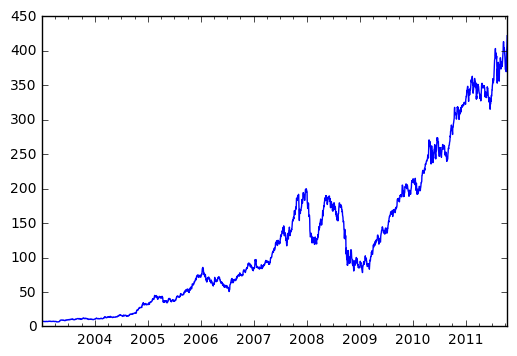

In [151]:
close_px['AAPL'].plot()

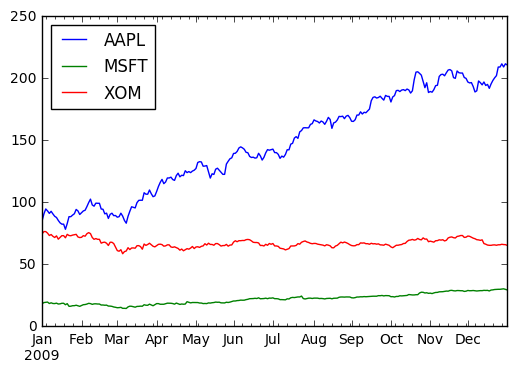

In [152]:
close_px.ix['2009'].plot()

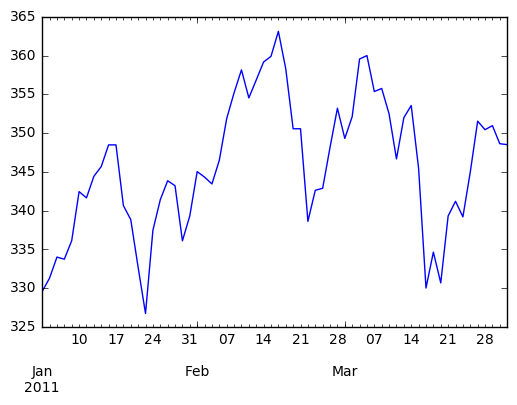

In [153]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


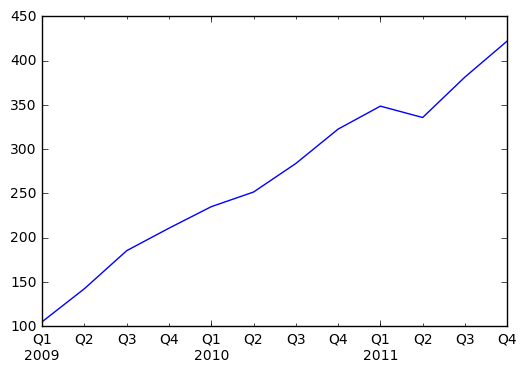

In [154]:
appl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill')
fig=plt.figure()
aa=appl_q.ix['2009':].plot()
fig.savefig("test.jpg")

## Moving window functions

In [155]:
close_px = close_px.asfreq('B').fillna(method='ffill')

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).mean()
  from ipykernel import kernelapp as app


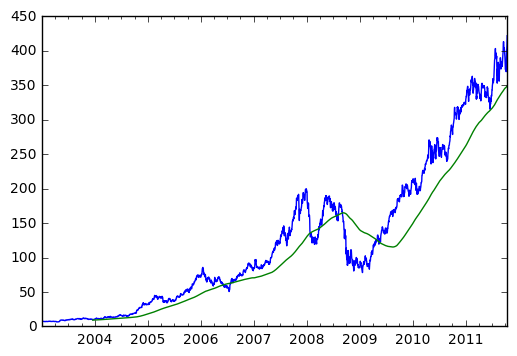

In [156]:
close_px.AAPL.plot()
pd.rolling_mean(close_px.AAPL, 250).plot()

In [157]:
appl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)
appl_std250[5:12]

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=10,window=250,center=False).std()
  if __name__ == '__main__':


2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

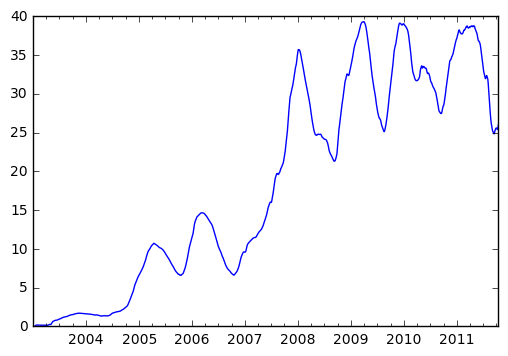

In [158]:
appl_std250.plot()

In [159]:
# Define expanding mean in terms of rolling_mean
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=60,center=False).mean()
  if __name__ == '__main__':


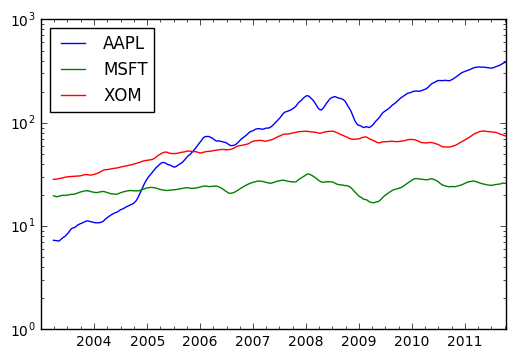

In [160]:
pd.rolling_mean(close_px, 60).plot(logy=True)

### Exponentially-weighted functions

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=50,window=60,center=False).mean()
/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,ignore_na=False,adjust=True,span=60).mean()


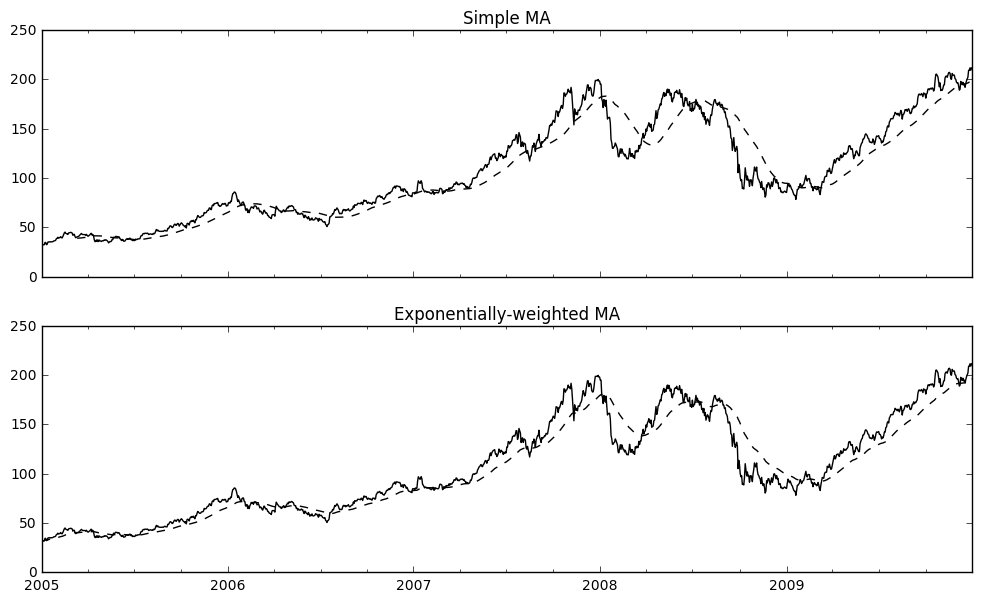

In [161]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ewma60 = pd.ewma(aapl_px, span=60)

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

### Binary moving window functions

In [162]:
close_px
spx_px = close_px_all['SPX']

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=100,window=125).corr(other=<Series>)
  app.launch_new_instance()


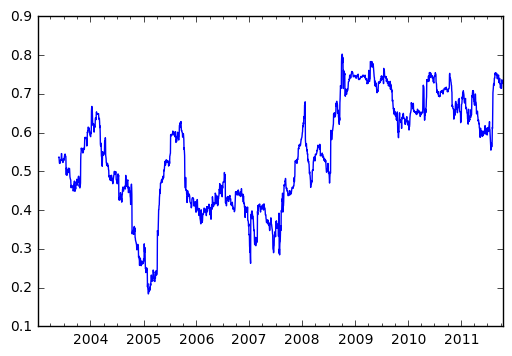

In [163]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)
corr.plot()

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=125).corr(other=<Series>)
  if __name__ == '__main__':


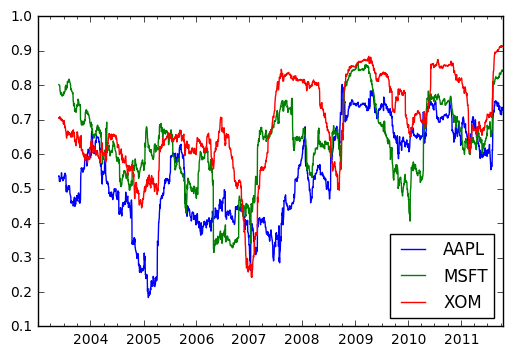

In [164]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100)
corr.plot()

### User-defined moving window functions

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=250).apply(kwargs=<dict>,args=<tuple>,func=<function>)
  app.launch_new_instance()


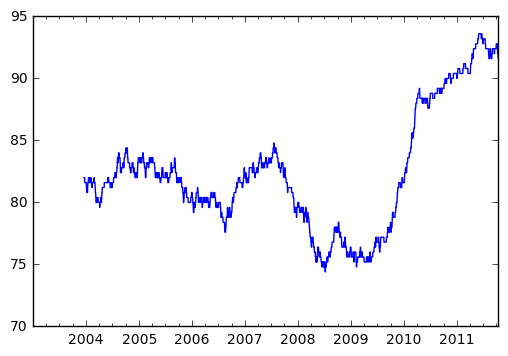

In [165]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)
result.plot()

## Performance and Memory Usage Notes

In [166]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01 00:00:00.000    0.847651
2000-01-01 00:00:00.010    0.056744
2000-01-01 00:00:00.020    0.291334
2000-01-01 00:00:00.030   -1.130481
2000-01-01 00:00:00.040   -0.642203
2000-01-01 00:00:00.050   -0.254793
                             ...   
2000-01-02 03:46:39.940    1.347373
2000-01-02 03:46:39.950   -0.105254
2000-01-02 03:46:39.960    0.688333
2000-01-02 03:46:39.970   -0.634839
2000-01-02 03:46:39.980   -1.759622
2000-01-02 03:46:39.990    1.943711
Freq: 10L, dtype: float64

In [167]:
ts.resample('15min', how='ohlc').info()

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2000-01-01 00:00:00 to 2000-01-02 03:45:00
Freq: 15T
Data columns (total 4 columns):
open     112 non-null float64
high     112 non-null float64
low      112 non-null float64
close    112 non-null float64
dtypes: float64(4)
memory usage: 4.4 KB


In [168]:
%timeit ts.resample('15min', how='ohlc')

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:257: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()


1 loop, best of 3: 92.9 ms per loop


In [169]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('15s', how='ohlc')

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:257: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()


10 loops, best of 3: 115 ms per loop


A number of string aliases are given to useful common time series frequencies. We will refer to these aliases as offset aliases (referred to as time rules prior to v0.8.0).

Alias |	Description
------|------
B |	business day frequency
C	|custom business day frequency (experimental)
D|	calendar day frequency
W|	weekly frequency
M|	month end frequency
BM	|business month end frequency
CBM|	custom business month end frequency
MS|	month start frequency
BMS|	business month start frequency
CBMS|	custom business month start frequency
Q|	quarter end frequency
BQ	|business quarter endfrequency
QS|	quarter start frequency
BQS|	business quarter start frequency
A|	year end frequency
BA	|business year end frequency
AS|	year start frequency
BAS|	business year start frequency
BH|	business hour frequency
H|	hourly frequency
T	|minutely frequency
S	|secondly frequency
L|	milliseonds
U	|microseconds
N|	nanoseconds